In [1]:
import pandas as pd
from tqdm.auto import tqdm

In [2]:
train_data = pd.read_csv('./data/train_dataset_train.csv', low_memory=False)
test_data = pd.read_csv('./data/test_dataset_test.csv', low_memory=False)

In [3]:
def prepare_oper_index(x):
    if x == ' ':
        x = '0'
    return int(float(x))


train_data['index_oper'] = train_data['index_oper'].apply(prepare_oper_index)
test_data['index_oper'] = test_data['index_oper'].apply(prepare_oper_index)

In [4]:
all_data = pd.concat([train_data, test_data])

In [5]:
group_columns = list(train_data.columns)[2:-1]
group_columns

['index_oper',
 'type',
 'priority',
 'is_privatecategory',
 'class',
 'is_in_yandex',
 'is_return',
 'weight',
 'mailtype',
 'mailctg',
 'mailrank',
 'directctg',
 'transport_pay',
 'postmark',
 'name_mfi',
 'weight_mfi',
 'price_mfi',
 'dist_qty_oper_login_1',
 'total_qty_oper_login_1',
 'total_qty_oper_login_0',
 'total_qty_over_index_and_type',
 'total_qty_over_index',
 'is_wrong_sndr_name',
 'is_wrong_rcpn_name',
 'is_wrong_phone_number',
 'is_wrong_address']

In [6]:
different_operations = all_data.groupby(group_columns)['oper_type + oper_attr'].agg(['unique'])
different_operations

unique
index_oper type    priority is_privatecategory class is_in_yandex is_return weight mailtype mailctg mailrank directctg transport_pay postmark name_mfi                                           weight_mfi price_mfi dist_qty_oper_login_1 total_qty_oper_login_1 total_qty_oper_login_0 total_qty_over_index_and_type total_qty_over_index is_wrong_sndr_name is_wrong_rcpn_name is_wrong_phone_number is_wrong_address                                                   
0          0       0.0      0                  0.0   0            N         5.0    5.0      1.0     0.0      2.0       0.00          0.0      necklace                                           15.0       70.0      80.0                  380270.0               10965046.0             11345316.0                    14302220.0           0                  0                  1                     0                                                             [8_0]
                                                                            7.0    5.0      1.0     0.0      2.0       0.00          0.0      LABEL                                              6.0        200.0     113.0                 764211.0               12597620.0             13361831.0                    17604144.0           0                  0                  0                     0                                                             [8_0]
                                                                            8.0    5.0      0.0     0.0      2.0       0.00          0.0      electric scooter decal                             7.0        100.0     113.0                 764211.0               12597620.0             13361831.0                    17604144.0           0                  0                  1                     0                                                             [8_0]
                                                                                            1.0     0.0      2.0       0.00          0.0      Rings                                              10.0       118.0     15.0                  2344706.0              0.0                    2344706.0                     2382462.0            0                  0                  0                     0                                                         [1023_-1]
                                                                                                                                              ring                                               10.0       100.0     6.0                   117268.0               0.0                    117268.0                      118378.0             0                  0                  0                     0                                                         [1023_-1]
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                      ...
694928     Участок 7503.0   N                  0.0   Y            N         953.0  5.0      1.0     0.0      2.0       0.00          0.0      Hiking Shoes                                       978.0      1200.0    2.0                   43426.0                4455.0                 47881.0                       463860.0             0                  0                  0                     0                 [1022_-1, 8_3, 1001_-1, 8_0, 1020_-1, 1018_-1,...
                                                                            1052.0 5.0      1.0     0.0      2.0       64.81         0.0      Motherboard P8H67                                  947.0      1500.0    3.0                   61912.0                5910.0                 67822.0                

In [7]:
train_data = train_data.merge(different_operations, on=group_columns).set_index('id')
test_data = test_data.merge(different_operations, on=group_columns).set_index('id')
train_data

,oper_type + oper_attr,index_oper,type,priority,is_privatecategory,class,is_in_yandex,is_return,weight,mailtype,...,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,is_wrong_sndr_name,is_wrong_rcpn_name,is_wrong_phone_number,is_wrong_address,label,unique
id,,,,,,,,,,,,,,,,,,,,,
6818780,1043_-1,628629,Участок,7503.0,N,0.0,Y,N,87.0,5.0,...,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0,"[1043_-1, 1044_-1, 1001_-1, 1041_-1, 1042_-1, ..."
6680799,1044_-1,628629,Участок,7503.0,N,0.0,Y,N,87.0,5.0,...,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0,"[1043_-1, 1044_-1, 1001_-1, 1041_-1, 1042_-1, ..."
6904351,1001_-1,628629,Участок,7503.0,N,0.0,Y,N,87.0,5.0,...,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0,"[1043_-1, 1044_-1, 1001_-1, 1041_-1, 1042_-1, ..."
1946335,1041_-1,628629,Участок,7503.0,N,0.0,Y,N,87.0,5.0,...,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0,"[1043_-1, 1044_-1, 1001_-1, 1041_-1, 1042_-1, ..."
7592272,1042_-1,628629,Участок,7503.0,N,0.0,Y,N,87.0,5.0,...,720176.0,58950.0,779126.0,8290896.0,0,0,0,0,0,"[1043_-1, 1044_-1, 1001_-1, 1041_-1, 1042_-1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595108,1014_-1,102976,ММПО,7503.0,N,0.0,N,N,23.0,5.0,...,64270133.0,116432632.0,180702765.0,188407812.0,0,0,1,0,0,"[1014_-1, 1022_-1, 1020_-1, 1004_-1]"
6706971,39_-1,104006,Участок,7503.0,N,0.0,N,N,81.0,5.0,...,15.0,13673720.0,13673735.0,14041298.0,0,0,0,0,0,[39_-1]
4545583,8_0,102998,ТИ,7503.0,N,0.0,N,N,10.0,5.0,...,6230578.0,3806501.0,10037079.0,10037413.0,0,1,0,0,0,[8_0]


In [8]:
most_popular_operations = list(train_data['oper_type + oper_attr'].value_counts().index[:80])

In [9]:
features = []
for i in tqdm(range(len(train_data))):
    values = set(train_data.iloc[i]['unique'])
    features.append([x in values for x in most_popular_operations])
train_data[most_popular_operations] = features

features = []
for i in tqdm(range(len(test_data))):
    values = set(test_data.iloc[i]['unique'])
    features.append([x in values for x in most_popular_operations])
test_data[most_popular_operations] = features

In [10]:
columns_with_numbers = [
    'priority', 'weight', 'transport_pay', 'weight_mfi', 'price_mfi', 'dist_qty_oper_login_1', 'total_qty_oper_login_1', 'total_qty_oper_login_0', 'total_qty_over_index_and_type', 'total_qty_over_index'
]

train_data = train_data[columns_with_numbers + most_popular_operations + ['label']]
test_data = test_data[columns_with_numbers + most_popular_operations]
train_data

,priority,weight,transport_pay,weight_mfi,price_mfi,dist_qty_oper_login_1,total_qty_oper_login_1,total_qty_oper_login_0,total_qty_over_index_and_type,total_qty_over_index,1020_-1,1022_-1,1019_-1,8_0,1_-1,1001_-1,1018_-1,1004_-1,1042_-1,1041_-1,1023_-1,8_2,1043_-1,8_6,1044_-1,2_1,8_3,1014_-1,1016_-1,11_-1,9_-1,8_13,0_-1,185_-1,184_-1,183_-1,39_-1,14_1,29_-1,2_6,1026_-1,14_10,8_5,131_-1,12_1,1027_-1,26_-1,1025_-1,8_4,1021_-1,14_1001,4_3,1017_1001,1017_-1,8_20,12_9,1017_1000,14_18,154_-1,41_-1,1015_-1,14_21,1012_-1,14_20,12_8,114_-1,1045_-1,6_3,8_182,184_1,30_-1,183_1,11_0,3_1,104_-1,14_16,1005_-1,12_2,3_9,4_1,1002_-1,1013_-1,12_10,2_8,41_3,41_1,1003_-1,12_11,6_1,20_-1,label
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6818780,7503.0,87.0,0.0,41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,True,True,True,True,True,True,True,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
6680799,7503.0,87.0,0.0,41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,True,True,True,True,True,True,True,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
6904351,7503.0,87.0,0.0,41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,True,True,True,True,True,True,True,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1946335,7503.0,87.0,0.0,41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,True,True,True,True,True,True,True,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
7592272,7503.0,87.0,0.0,41.0,150.0,42.0,720176.0,58950.0,779126.0,8290896.0,True,True,True,True,True,True,True,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595108,7503.0,23.0,0.0,10.0,100.0,1089.0,64270133.0,116432632.0,180702765.0,188407812.0,True,True,False,False,False,False,Fals

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(train_data.drop('label', axis=1), train_data['label'], test_size=0.3)

In [12]:
from catboost import CatBoostClassifier


model_cb = CatBoostClassifier(task_type='CPU', loss_function='Logloss', eval_metric='AUC', iterations=500)
model_cb.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=5, use_best_model=True)

Learning rate set to 0.336356
0:	test: 0.9718722	best: 0.9718722 (0)	total: 279ms	remaining: 2m 19s
5:	test: 0.9775388	best: 0.9777454 (4)	total: 1.13s	remaining: 1m 32s
10:	test: 0.9798544	best: 0.9798544 (10)	total: 1.92s	remaining: 1m 25s
15:	test: 0.9806353	best: 0.9806353 (15)	total: 2.67s	remaining: 1m 20s
20:	test: 0.9810355	best: 0.9810355 (20)	total: 3.58s	remaining: 1m 21s
25:	test: 0.9811512	best: 0.9811512 (25)	total: 4.45s	remaining: 1m 21s
30:	test: 0.9814678	best: 0.9814678 (30)	total: 5.24s	remaining: 1m 19s
35:	test: 0.9815126	best: 0.9815193 (34)	total: 5.95s	remaining: 1m 16s
40:	test: 0.9815669	best: 0.9815669 (40)	total: 6.66s	remaining: 1m 14s
45:	test: 0.9816702	best: 0.9816702 (45)	total: 7.39s	remaining: 1m 12s
50:	test: 0.9817774	best: 0.9817774 (50)	total: 8.23s	remaining: 1m 12s
55:	test: 0.9818159	best: 0.9818159 (55)	total: 8.95s	remaining: 1m 10s
60:	test: 0.9819208	best: 0.9819208 (60)	total: 9.7s	remaining: 1m 9s
65:	test: 0.9819635	best: 0.9819635 (65)

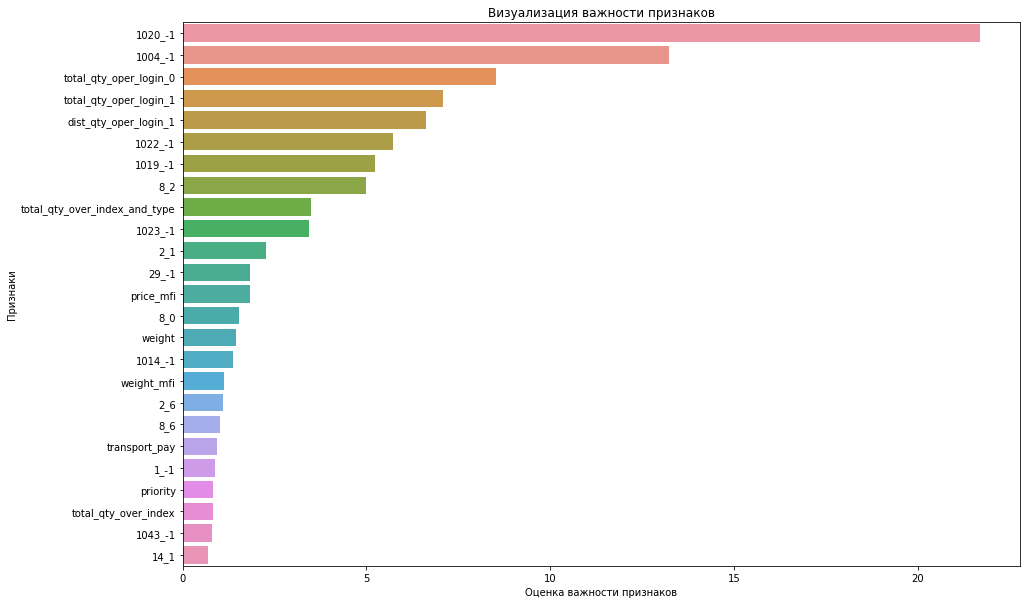

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


feature_imp = pd.Series(model_cb.feature_importances_, index=X_train.columns).sort_values(ascending=False)[:25]
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=feature_imp, y=feature_imp.index)
_ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
_ = ax.set_title('Визуализация важности признаков')

In [14]:
from sklearn.metrics import recall_score


print(recall_score(y_val, model_cb.predict_proba(X_val)[:,1] > 0.03, average='macro'))

0.9287817643985569


In [15]:
test_probs = model_cb.predict_proba(test_data)[:,1]
test_probs

array([3.02781832e-03, 3.02781832e-03, 3.02781832e-03, ...,
       5.32868346e-05, 5.64253438e-06, 2.10268994e-05])

In [16]:
print(sum(test_probs > 0.005))

780863


In [17]:
solution = pd.DataFrame({'id': test_data.index, 'label': (test_probs > 0.005).astype(int)})
solution

,id,label
0,7815282,0
1,9828137,0
2,4346994,0
3,1420919,0
4,3058883,0
...,...,...
3999995,5112843,0
3999996,1369588,0
3999997,1693676,0
3999998,4701757,0


In [18]:
solution.to_csv('./solution.csv', index=False, lineterminator='\n')